# Import Libray

In [1]:
# 1️⃣ Impor Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay
from google.colab import drive

Mengimpor library yang dibutuhkan untuk pengembangan proyek ini seperti manipulasi data (pandas, numpy),visualisasi (seaborn, matplotlib), machine learning (sklearn)

# Data Loading

Pada tahap, kita akan mengambil memanggil dataset yang telah di upload pada Google Drive



In [2]:
#akses drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/DBS/Submission_TerapanPertama/StudentsPerformance.csv")

Selanjutnya, kita melihat isi dari dataset secara sekilas dengan .head() dan ukuran dari dataset dengan .shape

In [4]:
print(df.shape)
df.head(100)

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82
96,male,group B,some high school,standard,completed,65,66,62
97,female,group E,some college,standard,completed,63,72,70
98,female,group D,some college,free/reduced,none,58,67,62


Menampilkan Informasi jumlah baris dan kolom

In [5]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (1000, 8)


melihat statistik deskriptif dari seluruh kolom dalam DataFrame (baik numerik maupun kategorikal), berikut ini

In [6]:
print(df.describe(include='all'))

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1000.000000    1000.000000

# Exploratory Data Analysis

Selanjutnya, kita akan menampilkan informasi dataset siswa



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Menangani Missing Value**

Pada tahap ini kita akan mengecek data yang tidak valid pada dataset

In [8]:
pd.DataFrame({'Jumlah missing valueg':df.isna().sum()})

,Jumlah missing valueg
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Dari hasil yang ditampilkan, data tidak memiliki nilai kosong (null) pada setiap kolom dataset



**Menangani Dupliaksi**

In [9]:
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


Hasil yang ditampilkan adalah 0, dengan demikian data tidak ada yang ganda (dupikat)



**Univariate Analysis**

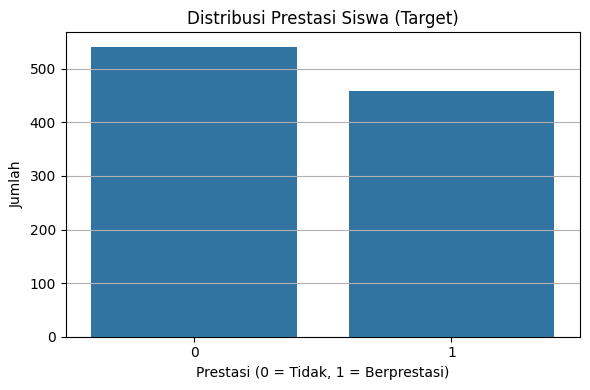

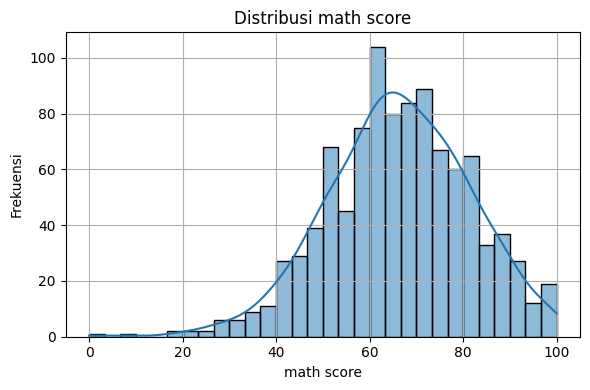

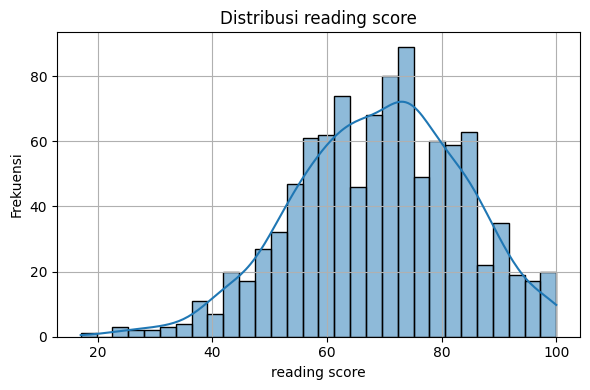

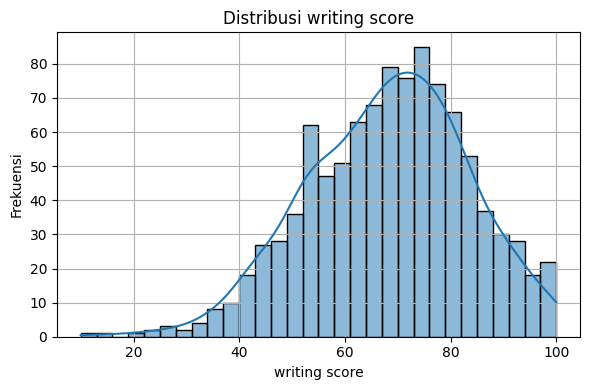

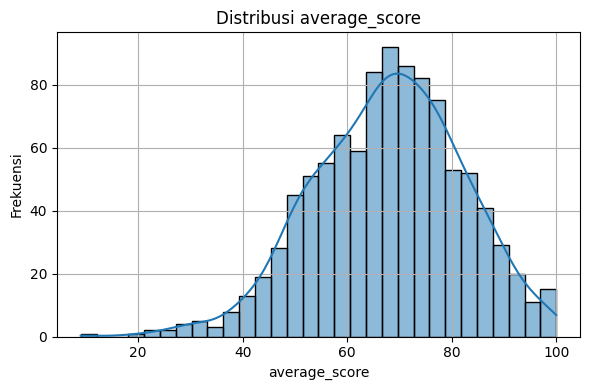

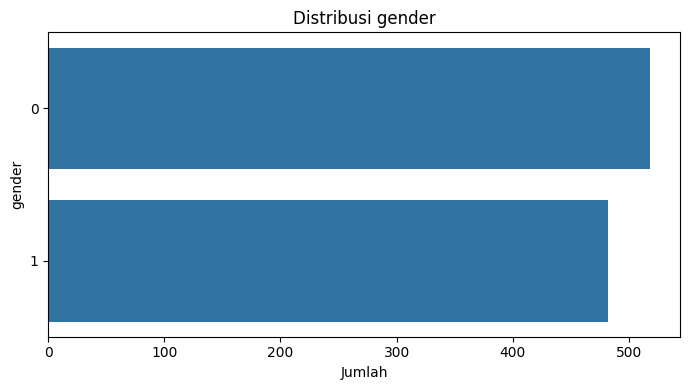

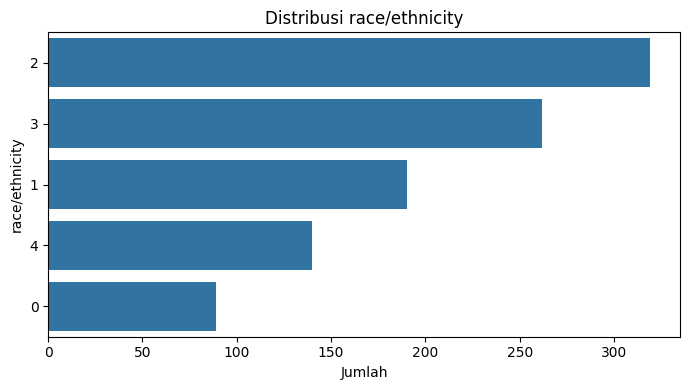

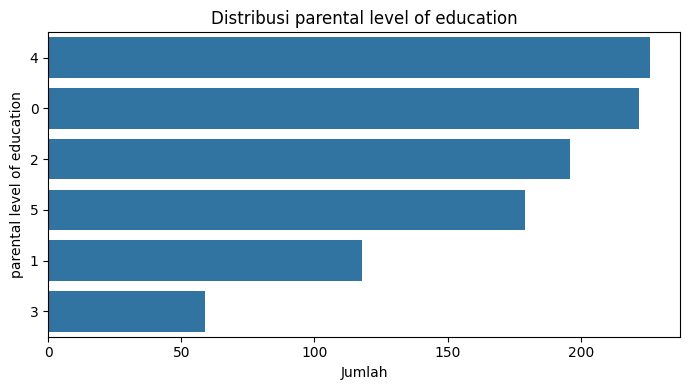

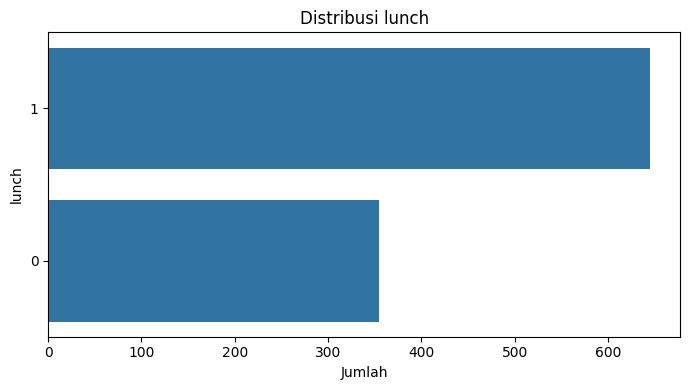

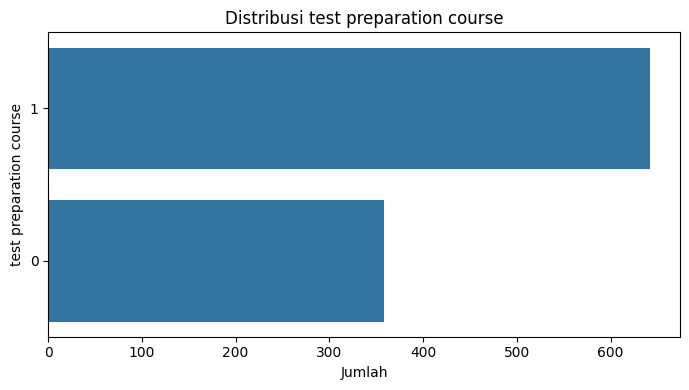

In [10]:
# PREPROCESSING & ENCODING - Move this block up

# Menambahkan kolom rata-rata dan total skor
df["average_score"] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
# Mengkategorikan prestasi berdasarkan nilai rata-rata
df["prestasi"] = df["average_score"].apply(lambda x: 1 if x >= 70 else 0)
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Encoding kolom kategorikal (Keep this here or move it as needed,
# but ensure 'prestasi' is created before being used in EDA)
label_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])




# Pisahkan kolom numerik dan kategorikal
num_cols = ['math score', 'reading score', 'writing score', 'average_score'] # Removed 'total_score'
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Visualisasi distribusi target 'prestasi' - This should now work
plt.figure(figsize=(6, 4))
sns.countplot(x='prestasi', data=df)
plt.title('Distribusi Prestasi Siswa (Target)')
plt.xlabel('Prestasi (0 = Tidak, 1 = Berprestasi)')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Distribusi fitur numerik
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Distribusi fitur kategorikal
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xlabel('Jumlah')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ... rest of your code

**Multivariate Analysis**

Pada bagian ini, akan ditunjukan hubungan antara dua variabel biasa disebut sebagai bivariate EDA. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik

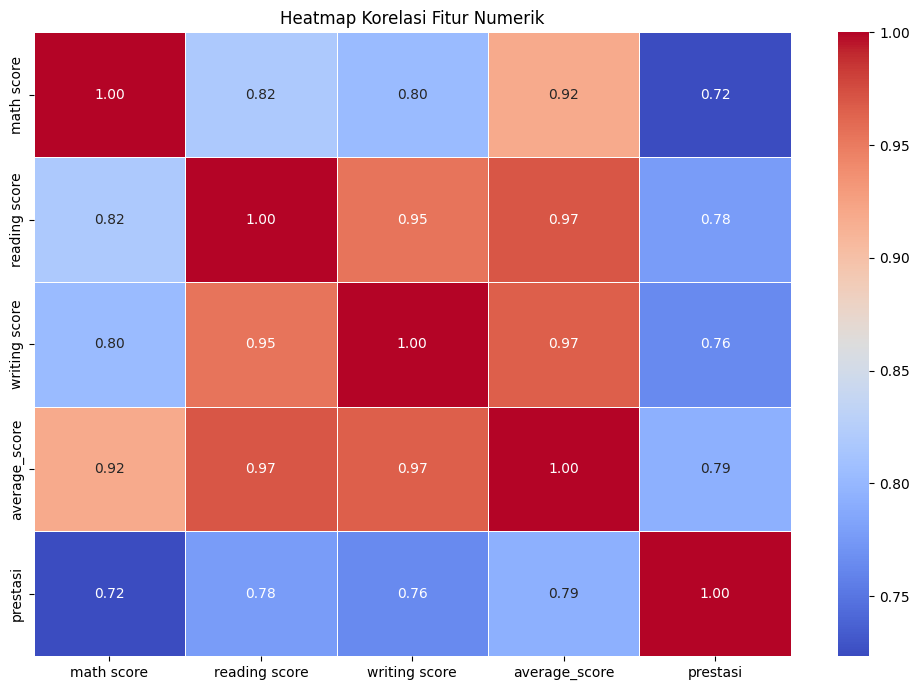

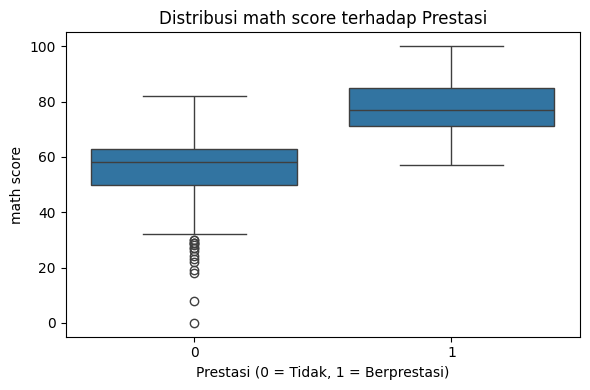

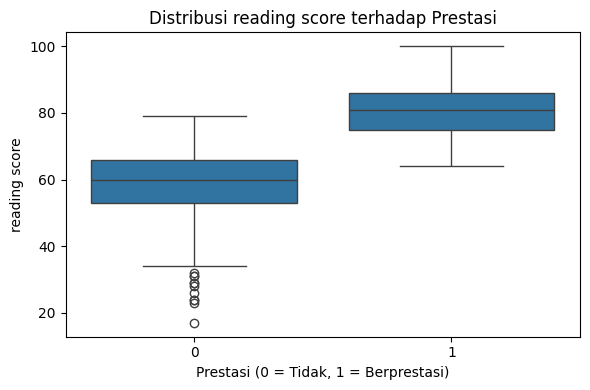

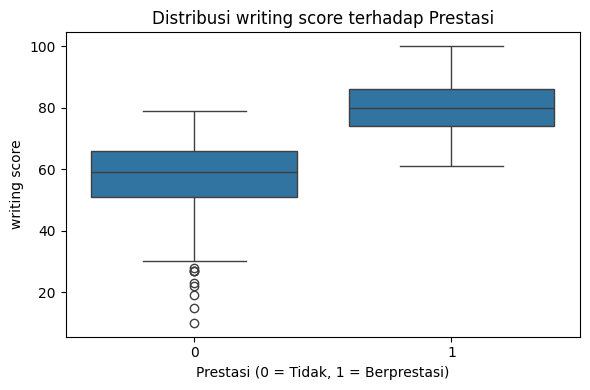

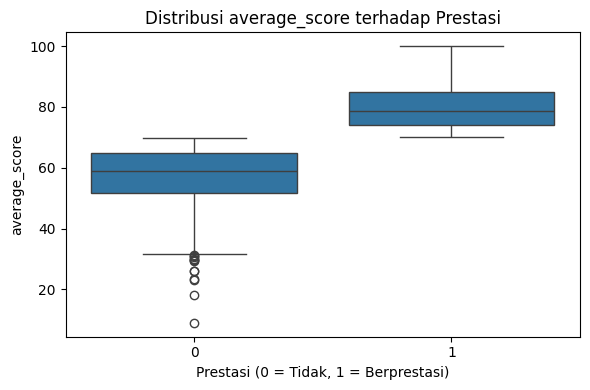

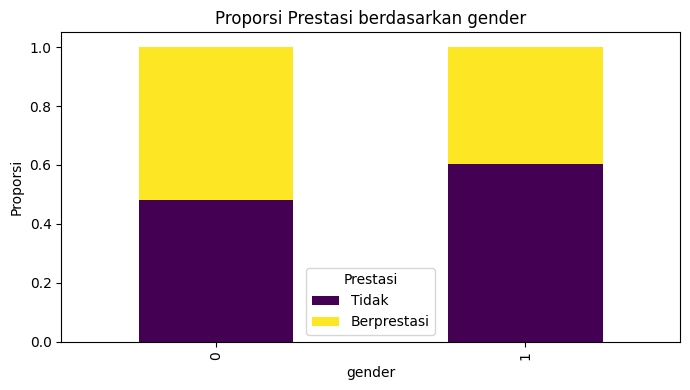

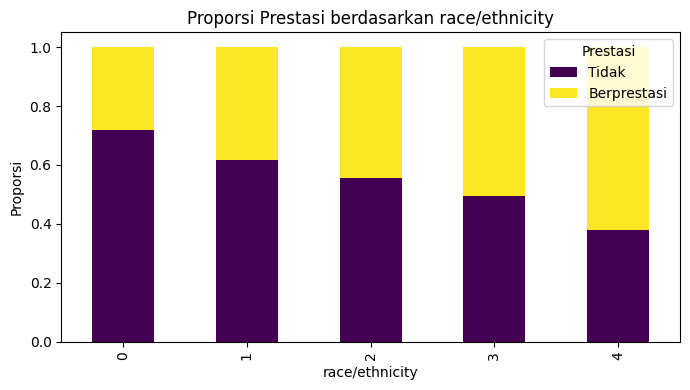

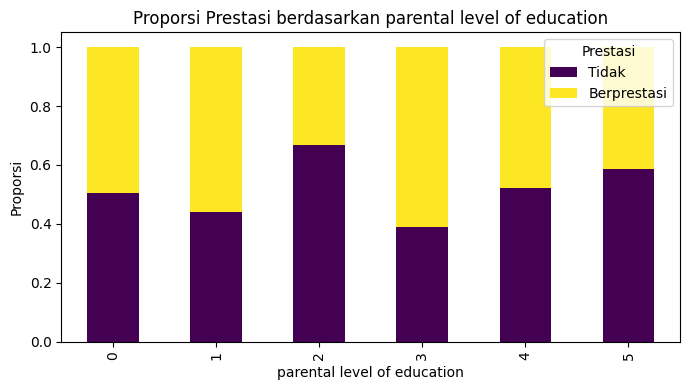

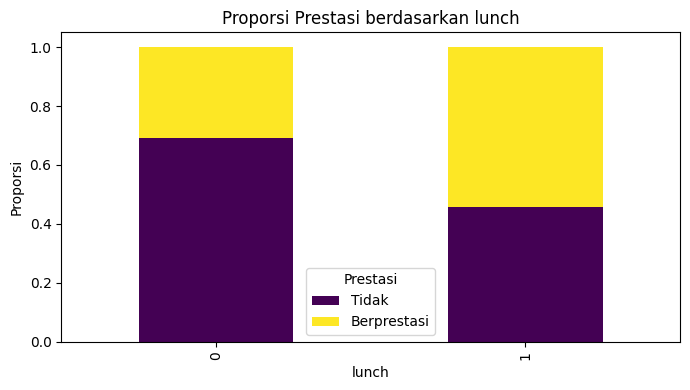

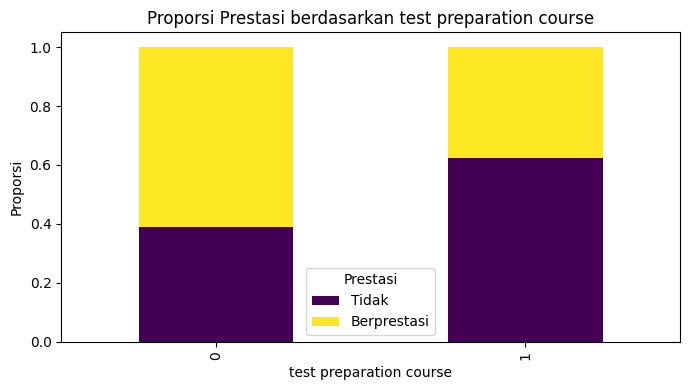

In [11]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 7))
corr_matrix = df[num_cols + ['prestasi']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

# Boxplot nilai numerik terhadap label prestasi
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='prestasi', y=col, data=df)
    plt.title(f'Distribusi {col} terhadap Prestasi')
    plt.xlabel('Prestasi (0 = Tidak, 1 = Berprestasi)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Proporsi prestasi berdasarkan fitur kategorikal
for col in cat_cols:
    cross_tab = pd.crosstab(df[col], df['prestasi'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(7, 4), colormap='viridis')
    plt.title(f'Proporsi Prestasi berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Proporsi')
    plt.legend(title='Prestasi', labels=['Tidak', 'Berprestasi'])
    plt.tight_layout()
    plt.show()


# PREPROCESSING & ENCODING

In [12]:
# 1. Label Encoding untuk fitur kategorikal
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [13]:
# 2. Membuat target untuk klasifikasi (misalnya, 'prestasi' berdasarkan nilai rata-rata)
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['prestasi'] = df['average_score'].apply(lambda x: 1 if x >= 70 else 0)

In [14]:
# 3. Membuat target untuk regresi (skor matematika dan total skor)
y_reg_math = df['math score']
X_reg_math = df.drop(['math score', 'reading score', 'writing score', 'average_score', 'prestasi'], axis=1)

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
y_reg_total = df['total_score']
X_reg_total = df.drop(['math score', 'reading score', 'writing score', 'average_score', 'prestasi', 'total_score'], axis=1)


y_class = df['prestasi']
X_class = df.drop(['average_score', 'prestasi', 'math score', 'reading score', 'writing score', 'total_score'], axis=1)  # Fitur untuk klasifikasi

In [15]:
# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42) # Klasifikasi
X_train_reg_math, X_test_reg_math, y_train_reg_math, y_test_reg_math = train_test_split(X_reg_math, y_reg_math, test_size=0.2, random_state=42) # Regresi Math
X_train_reg_total, X_test_reg_total, y_train_reg_total, y_test_reg_total = train_test_split(X_reg_total, y_reg_total, test_size=0.2, random_state=42) # Regresi Total

# MODEL DEPLOYMENT DAN EVALUASI

**🎯Problem 1: Klasifikasi Prestasi Siswa**

**Menggunakan RandomForestClassifier**

Langkah 1 :

kita melatih model klasifikasi menggunakan Random Forest dengan memanggil fungsi RandomForestClassifier. Parameter yang digunakan:

- n_estimators=100: Jumlah pohon keputusan dalam model. Semakin banyak, hasil prediksi biasanya lebih stabil.

- max_depth=10: Batas kedalaman pohon untuk mencegah overfitting.

- random_state=42: Agar hasil pelatihan konsisten setiap kali dijalankan.

Model dilatih dengan data latih (X_train, y_train), lalu dilakukan prediksi pada data uji (X_test). Evaluasi dilakukan menggunakan akurasi, classification report, dan confusion matrix untuk melihat performa klasifikasi.

In [16]:
# Inisialisasi dan melatih model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Penjelasan parameter
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

Langkah 2 :

Lalu, model yang sudah dilatih digunakan untuk memprediksi kelas (0 atau 1) pada data uji (X_test).

Hasilnya disimpan dalam y_pred_class.

In [17]:
# Melakukan prediksi
y_pred_class = rf_classifier.predict(X_test)

Langkah ke 3

- accuracy_score(): Mengukur seberapa sering model memprediksi dengan benar.

- Akurasi = (jumlah prediksi benar) / (total prediksi)

- Mengalikan accuracy dengan 100 untuk mengkonversi ke persentase

- Menggunakan format .2f untuk menampilkan 2 angka desimal

- Menambahkan tanda % di akhir output


**Evaluasi Model**

In [18]:
# Evaluasi model klasifikasi
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Akurasi Klasifikasi: {accuracy*100:.2f}%")

Akurasi Klasifikasi: 59.00%


Dari hasil yang diperoleh menunjukan model yang dibangun menggunakan algoritma RandomForestClassifier memperoleh akurasi (78.07%)

Langkah ke 4:

Menampilkan metrik evaluasi:

- Precision: Proporsi prediksi positif yang benar.

- Recall: Proporsi kasus positif yang berhasil ditemukan oleh model.

- F1-Score: Harmonik rata-rata precision dan recall.

- Support: Jumlah aktual dari tiap kelas.

In [19]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       110
           1       0.54      0.54      0.54        90

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.59      0.59      0.59       200



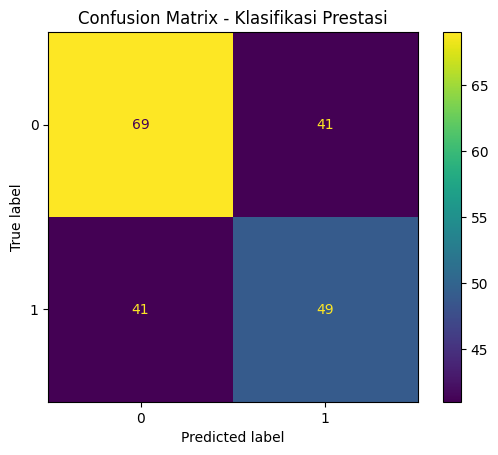

In [20]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class)
plt.title('Confusion Matrix - Klasifikasi Prestasi')
plt.show()

TN (True Negative): Model benar memprediksi siswa tidak berprestasi.

TP (True Positive): Model benar memprediksi siswa berprestasi.

FP dan FN: Kesalahan klasifikasi.

**🎯 Problem 2: Problem 2: Prediksi Skor Matematika dengan Random Forest Regressor**

**Menggunakan RandomForestRegressor**

Langkah 1: Inisialisasi Model

Menggunakan algoritma Random Forest Regressor untuk memprediksi nilai kontinu (skor matematika).

Parameter yang digunakan:

- n_estimators=100: Jumlah pohon dalam hutan.

- max_depth=10: Kedalaman maksimum setiap pohon untuk mencegah overfitting.

- random_state=42: Untuk memastikan hasil konsisten setiap kali dijalankan.

In [21]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42) # Inisialisasi model

Langkah 2: Melatih Model

Model dilatih menggunakan data latih:

- X_train_reg_math: Fitur input.

- y_train_reg_math: Nilai target (skor matematika).

In [22]:
rf_regressor.fit(X_train_reg_math, y_train_reg_math) # Melatih model

RandomForestRegressor(max_depth=10, random_state=42)

Langkah 3: Melakukan Prediksi

Model yang sudah dilatih digunakan untuk memprediksi nilai skor matematika pada data uji (X_test_reg_math).

In [23]:
y_pred_reg_math = rf_regressor.predict(X_test_reg_math) # Melakukan prediksi

Langkah 4: Evaluasi Model

Evaluasi model dilakukan dengan dua metrik:

- RMSE (Root Mean Squared Error): Mengukur rata-rata kesalahan prediksi.

- R² Score: Menunjukkan seberapa baik model menjelaskan variasi data.

**Evaluasi Model**

In [24]:
# Evaluasi model regresi
rmse_math = np.sqrt(mean_squared_error(y_test_reg_math, y_pred_reg_math))
r2_math = r2_score(y_test_reg_math, y_pred_reg_math)

print(f"\nRMSE (Math Score): {rmse_math:.2f}")
print(f"R² Score (Math Score): {r2_math:.2f}")


RMSE (Math Score): 4.47
R² Score (Math Score): 0.92


Dari hasil di atas menunjukkan bahwa:

RMSE (Math Score): 4.47

R² Score (Math Score): 0.92

Penjelasan Model Regresi (Math Score):
- Algoritma: Random Forest untuk regresi bekerja dengan cara yang sama seperti klasifikasi, tetapi memprediksi nilai kontinu (skor) sebagai rata-rata prediksi semua tree.
- Parameter (sama seperti klasifikasi):
  - n_estimators (100): Jumlah tree.
  - max_depth (10): Kedalaman tree.
  - random_state (42): Untuk reproducibility.

**🎯 Problem 3: Estimasi Total Skor dengan Linear Regression**

Langkah 1: Inisialisasi Model

Menggunakan algoritma Linear Regression yang mencari hubungan linier antara fitur dan target.

Model ini cocok untuk kasus sederhana dengan data yang relatif tidak kompleks.

In [25]:
linear_regressor = LinearRegression() # Inisialisasi model

Langkah 2: Melatih Model

Model dilatih menggunakan data pelatihan:

- X_train_reg_total: Data fitur (misalnya skor-skor individual).

- y_train_reg_total: Target atau skor total.



In [26]:
linear_regressor.fit(X_train_reg_total, y_train_reg_total) # Melatih model

LinearRegression()

Langkah 3: Melakukan Prediksi

Model digunakan untuk memprediksi nilai total skor berdasarkan data uji (X_test_reg_total).



In [27]:
y_pred_total = linear_regressor.predict(X_test_reg_total) # Melakukan prediksi

Langkah 4: Evaluasi Model

Menggunakan dua metrik evaluasi:

- RMSE (Root Mean Squared Error): Mengukur seberapa jauh prediksi dari nilai sebenarnya.

- R² Score: Menunjukkan seberapa besar variasi target yang dapat dijelaskan oleh model.

**Evaluasi Model**

In [28]:
# Evaluasi model regresi
rmse_total = np.sqrt(mean_squared_error(y_test_reg_total, y_pred_total))
r2_total = r2_score(y_test_reg_total, y_pred_total)

print(f"\nRMSE (Total Score): {rmse_total:.2f}")
print(f"R² Score (Total Score): {r2_total:.2f}")


RMSE (Total Score): 41.07
R² Score (Total Score): 0.13


Dari hasil di atas menunjukkan bahwa :

RMSE (Total Score): 41.07

R² Score (Total Score): 0.13

Penjelasan Model Regresi (Total Score):
- Algoritma: Linear Regression mencari hubungan linier antara fitur dan target. Ini mencoba menemukan garis terbaik yang meminimalkan selisih antara prediksi dan nilai sebenarnya.
- Parameter: Linear Regression memiliki sedikit parameter utama. Yang penting adalah regularisasi (misalnya, Ridge atau Lasso) untuk mencegah overfitting, tetapi di sini kita menggunakan versi sederhana tanpa regularisasi.
  - Tanpa Regularisasi: Model ini cocok karena jumlah fitur relatif kecil.

Melihat tabel   Model           | Accuracy/Precision (Avg) | RMSE  | R² Score

In [29]:
from tabulate import tabulate
import pandas as pd

# Data evaluasi terbaru dengan semua nilai yang sesuai
eval_data = {
    "Problem": ["Klasifikasi Prestasi",
                "Prediksi Skor Matematika",
                "Estimasi Total Skor"],
    "Model": ["Random Forest Classifier",
              "Random Forest Regressor",
              "Linear Regression"],
    "Accuracy/Precision (Avg)": [0.59,
                                 "-",
                                 "-"],
    "RMSE": ["-",
             4.47,
             41.07],
    "R² Score": ["-",
                 0.92,
                 0.13]
}

# Membuat DataFrame
eval_df = pd.DataFrame(eval_data)

# Menampilkan tabel dengan format yang rapih
print(tabulate(eval_df, headers='keys', tablefmt='pretty', showindex=False))

+--------------------------+--------------------------+--------------------------+-------+----------+
|         Problem          |          Model           | Accuracy/Precision (Avg) | RMSE  | R² Score |
+--------------------------+--------------------------+--------------------------+-------+----------+
|   Klasifikasi Prestasi   | Random Forest Classifier |           0.59           |   -   |    -     |
| Prediksi Skor Matematika | Random Forest Regressor  |            -             | 4.47  |   0.92   |
|   Estimasi Total Skor    |    Linear Regression     |            -             | 41.07 |   0.13   |
+--------------------------+--------------------------+--------------------------+-------+----------+
